# Performance/verification of a test

Import packages

In [1]:
import mallows_kendall as mk
import numpy as np
import itertools as it
import scipy as sp
import random
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import math
from scipy.stats import rankdata
from scipy.stats import norm

### The C++ load and verification part

Compile C++ codes if necessary

In [2]:
# Compilation
#import os
#os.system('clang++ -mmacosx-version-min=10.13 -std=gnu++11 -fPIC  -Wall -g -O2  -c rankDepth.cpp -o rankDepth.o')
#os.system('clang++ -mmacosx-version-min=10.13 -std=gnu++11 -dynamiclib -Wl,-headerpad_max_install_names -undefined dynamic_lookup -single_module -multiply_defined suppress -o rankDepth.so rankDepth.o')
# Restart the kernel after this line

Import (and test) the dynamic library

In [3]:
# Import and Test 1
from ctypes import *
cdll.LoadLibrary('rankDepth.so')
libc = CDLL('rankDepth.so')
libc.testFunc()

43

In [4]:
# Test 2
val = np.array([5.1])
obj = np.array([0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1, 8.1, 9.1])
n = 10
outp = np.array([1.1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
res2 = libc.testFuncCmp(c_void_p(val.ctypes.data),
                       c_void_p(obj.ctypes.data),
                       c_int(n),
                       c_void_p(outp.ctypes.data))
print(res2)
print(outp)

0
[  1.1   0.    0.    0.    0.    0.    0.    0.    0.  142. ]


Depth-calculating Python function

In [5]:
def qrdepth(objects, data):
    '''
    The function to calculate the qr-depths
    '''
    depths = np.zeros(objects.shape[0])
    for i in range(objects.shape[0]):
        for j in range(data.shape[0]):
            depths[i] += (mk.max_dist(objects.shape[1]) - mk.kendall_tau(objects[i,:], data[j,:])) / mk.max_dist(objects.shape[1])
        depths[i] /= data.shape[0]
    return depths

Plackett-Luce generator

In [6]:
def plackett_luce(m, n, w = None):
    '''
    Plackett-Luce generator
    '''
    if w is None:
        w = np.array([np.exp(i) for i in reversed(range(n))])
    sample = np.zeros((m,n))
    for m_ in range(m):
        ordering = []
        bucket = np.arange(n, dtype=int) # list of items to insert
        for i in range(n):
            j = np.random.choice(bucket, p = w[bucket] / w[bucket].sum())
            ordering.append(j)
            bucket = bucket[bucket!=j]
        sample[m_] = np.argsort(ordering)
    return sample

Difference between two Plackett-Luce distributions

In [7]:
# Model: Plackett-Luce model
def PlacketLuceDiff(m1 = 550, m2 = 50, scale = 1):
    m1 = m1
    m2 = m2
    w1 = np.array([np.exp(i) for i in reversed(range(n))])
    w2 = np.array([np.exp(i * scale) for i in reversed(range(n))])
    empDist1 = plackett_luce(m = m1, n = n, w = w1)
    empDist2 = plackett_luce(m = m2, n = n, w = w2)
    return empDist1, empDist2

### Testing for the Plackett-Luce model

In [8]:
# Define data settings and prepare structures
n = 10
print(math.factorial(n))
print(mk.max_dist(n))

3628800
45


### Main loop

[1.   0.95 0.9  0.85 0.8  0.75 0.7  0.65 0.6  0.55 0.5 ]
Scale value equals 1.0
Iteration 0
Plotting DD-plot
Performing the test
Calculating the p-value
2559.0
0.40734115886516165
Iteration 1
Plotting DD-plot
Performing the test
Calculating the p-value
2763.5
0.0500699222862544
Iteration 2
Plotting DD-plot
Performing the test
Calculating the p-value
2372.5
0.14655868467303546
Iteration 3
Plotting DD-plot
Performing the test
Calculating the p-value
2490.0
0.40466762332096984
Iteration 4
Plotting DD-plot
Performing the test
Calculating the p-value
2555.5
0.41673178864974525
Iteration 5
Plotting DD-plot
Performing the test
Calculating the p-value
2365.0
0.13501115502310757
Iteration 6
Plotting DD-plot
Performing the test
Calculating the p-value
2761.0
0.05187476244190059
Iteration 7
Plotting DD-plot
Performing the test
Calculating the p-value
2856.5
0.011147583714748777
Iteration 8
Plotting DD-plot
Performing the test
Calculating the p-value
2659.0
0.17780255371716114
Iteration 9
Plotting

Performing the test
Calculating the p-value
2677.0
0.14735141380480044
Iteration 82
Plotting DD-plot
Performing the test
Calculating the p-value
2582.5
0.3459069587573709
Iteration 83
Plotting DD-plot
Performing the test
Calculating the p-value
2277.5
0.04398352417650692
Iteration 84
Plotting DD-plot
Performing the test
Calculating the p-value
2448.5
0.29896582959684637
Iteration 85
Plotting DD-plot
Performing the test
Calculating the p-value
2571.5
0.37427093273380163
Iteration 86
Plotting DD-plot
Performing the test
Calculating the p-value
2639.0
0.21596436557242626
Iteration 87
Plotting DD-plot
Performing the test
Calculating the p-value
2725.5
0.08345347942734727
Iteration 88
Plotting DD-plot
Performing the test
Calculating the p-value
2614.0
0.2697563765993476
Iteration 89
Plotting DD-plot
Performing the test
Calculating the p-value
2610.5
0.277789245361035
Iteration 90
Plotting DD-plot
Performing the test
Calculating the p-value
2570.0
0.37819611098323314
Iteration 91
Plotting DD

Calculating the p-value
2834.5
0.016436243090464098
Iteration 63
Plotting DD-plot
Performing the test
Calculating the p-value
2544.0
0.4478945448450863
Iteration 64
Plotting DD-plot
Performing the test
Calculating the p-value
2722.0
0.08721875128519085
Iteration 65
Plotting DD-plot
Performing the test
Calculating the p-value
2816.5
0.022239498638775945
Iteration 66
Plotting DD-plot
Performing the test
Calculating the p-value
2484.5
0.3900457850249296
Iteration 67
Plotting DD-plot
Performing the test
Calculating the p-value
2514.0
0.4697763711370288
Iteration 68
Plotting DD-plot
Performing the test
Calculating the p-value
2524.0
0.4972497855621024
Iteration 69
Plotting DD-plot
Performing the test
Calculating the p-value
2504.5
0.4438072688585471
Iteration 70
Plotting DD-plot
Performing the test
Calculating the p-value
2564.0
0.39401910398073314
Iteration 71
Plotting DD-plot
Performing the test
Calculating the p-value
2521.5
0.4903751071332857
Iteration 72
Plotting DD-plot
Performing the

Performing the test
Calculating the p-value
2727.0
0.08187771159029067
Iteration 45
Plotting DD-plot
Performing the test
Calculating the p-value
2770.5
0.04528174339541213
Iteration 46
Plotting DD-plot
Performing the test
Calculating the p-value
2947.5
0.0017919438690880973
Iteration 47
Plotting DD-plot
Performing the test
Calculating the p-value
2440.0
0.2789462619057107
Iteration 48
Plotting DD-plot
Performing the test
Calculating the p-value
2595.0
0.3147014686110181
Iteration 49
Plotting DD-plot
Performing the test
Calculating the p-value
2746.0
0.06381255650102735
Iteration 50
Plotting DD-plot
Performing the test
Calculating the p-value
3017.5
0.00034288454554520786
Iteration 51
Plotting DD-plot
Performing the test
Calculating the p-value
2807.0
0.025944276574868308
Iteration 52
Plotting DD-plot
Performing the test
Calculating the p-value
2816.0
0.022422705465046433
Iteration 53
Plotting DD-plot
Performing the test
Calculating the p-value
2682.0
0.13955302217727428
Iteration 54
Pl

Performing the test
Calculating the p-value
2926.0
0.002851188940822591
Iteration 26
Plotting DD-plot
Performing the test
Calculating the p-value
2712.5
0.09807623778696639
Iteration 27
Plotting DD-plot
Performing the test
Calculating the p-value
2748.0
0.06210725885475732
Iteration 28
Plotting DD-plot
Performing the test
Calculating the p-value
2725.5
0.08345347942734727
Iteration 29
Plotting DD-plot
Performing the test
Calculating the p-value
2711.0
0.09987739365284076
Iteration 30
Plotting DD-plot
Performing the test
Calculating the p-value
2733.5
0.07530765911987447
Iteration 31
Plotting DD-plot
Performing the test
Calculating the p-value
2749.5
0.06085178010834591
Iteration 32
Plotting DD-plot
Performing the test
Calculating the p-value
3079.0
6.694904521609146e-05
Iteration 33
Plotting DD-plot
Performing the test
Calculating the p-value
2832.5
0.017009364947605743
Iteration 34
Plotting DD-plot
Performing the test
Calculating the p-value
2928.0
0.002732968960593718
Iteration 35
Pl

Performing the test
Calculating the p-value
2915.5
0.0035508569084555797
Iteration 7
Plotting DD-plot
Performing the test
Calculating the p-value
2793.5
0.03208545008562247
Iteration 8
Plotting DD-plot
Performing the test
Calculating the p-value
2800.0
0.02899321713837022
Iteration 9
Plotting DD-plot
Performing the test
Calculating the p-value
2972.5
0.0010178141687895437
Iteration 10
Plotting DD-plot
Performing the test
Calculating the p-value
2796.0
0.030865344783258863
Iteration 11
Plotting DD-plot
Performing the test
Calculating the p-value
3007.0
0.0004455600971875473
Iteration 12
Plotting DD-plot
Performing the test
Calculating the p-value
2948.5
0.0017527829719705679
Iteration 13
Plotting DD-plot
Performing the test
Calculating the p-value
2888.5
0.0061069470337026255
Iteration 14
Plotting DD-plot
Performing the test
Calculating the p-value
3097.0
4.018988139220525e-05
Iteration 15
Plotting DD-plot
Performing the test
Calculating the p-value
2914.5
0.00362494071651398
Iteration 

Calculating the p-value
2994.0
0.0006120558923432551
Iteration 87
Plotting DD-plot
Performing the test
Calculating the p-value
2867.0
0.009194610308953965
Iteration 88
Plotting DD-plot
Performing the test
Calculating the p-value
2765.5
0.04866239872999667
Iteration 89
Plotting DD-plot
Performing the test
Calculating the p-value
2950.0
0.0016955003789966838
Iteration 90
Plotting DD-plot
Performing the test
Calculating the p-value
2904.0
0.004490747190573852
Iteration 91
Plotting DD-plot
Performing the test
Calculating the p-value
2878.0
0.007476437376713885
Iteration 92
Plotting DD-plot
Performing the test
Calculating the p-value
2857.5
0.01094719354393725
Iteration 93
Plotting DD-plot
Performing the test
Calculating the p-value
3002.0
0.0005038786262172579
Iteration 94
Plotting DD-plot
Performing the test
Calculating the p-value
2835.5
0.01615593626933931
Iteration 95
Plotting DD-plot
Performing the test
Calculating the p-value
2892.5
0.0056468285082738046
Iteration 96
Plotting DD-plot

Performing the test
Calculating the p-value
2922.5
0.0030692180123729207
Iteration 67
Plotting DD-plot
Performing the test
Calculating the p-value
2824.5
0.019475742140302565
Iteration 68
Plotting DD-plot
Performing the test
Calculating the p-value
2976.0
0.0009382504256040258
Iteration 69
Plotting DD-plot
Performing the test
Calculating the p-value
3068.5
8.955556163681155e-05
Iteration 70
Plotting DD-plot
Performing the test
Calculating the p-value
3065.0
9.856638580885146e-05
Iteration 71
Plotting DD-plot
Performing the test
Calculating the p-value
2946.5
0.0018318990302670368
Iteration 72
Plotting DD-plot
Performing the test
Calculating the p-value
3165.0
5.119947790177548e-06
Iteration 73
Plotting DD-plot
Performing the test
Calculating the p-value
2954.0
0.0015509816684090572
Iteration 74
Plotting DD-plot
Performing the test
Calculating the p-value
3003.5
0.00048568072958332653
Iteration 75
Plotting DD-plot
Performing the test
Calculating the p-value
3107.0
3.0077346810264416e-05

Performing the test
Calculating the p-value
3142.5
1.0362485763248941e-05
Iteration 47
Plotting DD-plot
Performing the test
Calculating the p-value
3038.5
0.00020008132674276258
Iteration 48
Plotting DD-plot
Performing the test
Calculating the p-value
2953.0
0.001586018296061531
Iteration 49
Plotting DD-plot
Performing the test
Calculating the p-value
3063.0
0.00010409104409847547
Iteration 50
Plotting DD-plot
Performing the test
Calculating the p-value
2886.0
0.006411114466710277
Iteration 51
Plotting DD-plot
Performing the test
Calculating the p-value
3288.0
7.20337471893373e-08
Iteration 52
Plotting DD-plot
Performing the test
Calculating the p-value
3078.0
6.884471815271631e-05
Iteration 53
Plotting DD-plot
Performing the test
Calculating the p-value
3144.0
9.893780980152478e-06
Iteration 54
Plotting DD-plot
Performing the test
Calculating the p-value
3143.0
1.020395035344901e-05
Iteration 55
Plotting DD-plot
Performing the test
Calculating the p-value
3185.0
2.683301497663493e-06


Performing the test
Calculating the p-value
3187.5
2.471934331005343e-06
Iteration 27
Plotting DD-plot
Performing the test
Calculating the p-value
3186.5
2.5544937128918477e-06
Iteration 28
Plotting DD-plot
Performing the test
Calculating the p-value
3396.5
9.39337607697155e-10
Iteration 29
Plotting DD-plot
Performing the test
Calculating the p-value
3278.0
1.0455776910944792e-07
Iteration 30
Plotting DD-plot
Performing the test
Calculating the p-value
3035.5
0.00021634760608502113
Iteration 31
Plotting DD-plot
Performing the test
Calculating the p-value
3107.0
3.0077346810264416e-05
Iteration 32
Plotting DD-plot
Performing the test
Calculating the p-value
3346.5
7.425628556489983e-09
Iteration 33
Plotting DD-plot
Performing the test
Calculating the p-value
3180.0
3.1590925800850655e-06
Iteration 34
Plotting DD-plot
Performing the test
Calculating the p-value
2986.5
0.0007325779949848288
Iteration 35
Plotting DD-plot
Performing the test
Calculating the p-value
2982.5
0.0008054590404369

Calculating the p-value
3315.0
2.574053858950265e-08
Iteration 6
Plotting DD-plot
Performing the test
Calculating the p-value
3419.5
3.4904212853348326e-10
Iteration 7
Plotting DD-plot
Performing the test
Calculating the p-value
3249.0
3.0014224661201183e-07
Iteration 8
Plotting DD-plot
Performing the test
Calculating the p-value
3304.0
3.930600389612238e-08
Iteration 9
Plotting DD-plot
Performing the test
Calculating the p-value
3141.0
1.0852283497952975e-05
Iteration 10
Plotting DD-plot
Performing the test
Calculating the p-value
3290.0
6.682389031009706e-08
Iteration 11
Plotting DD-plot
Performing the test
Calculating the p-value
3449.0
9.45822309361688e-11
Iteration 12
Plotting DD-plot
Performing the test
Calculating the p-value
3112.0
2.59754481455321e-05
Iteration 13
Plotting DD-plot
Performing the test
Calculating the p-value
3325.5
1.7095000304223618e-08
Iteration 14
Plotting DD-plot
Performing the test
Calculating the p-value
3451.0
8.644263083112946e-11
Iteration 15
Plotting 

Performing the test
Calculating the p-value
3326.5
1.6437104344291242e-08
Iteration 86
Plotting DD-plot
Performing the test
Calculating the p-value
3414.5
4.33761582208092e-10
Iteration 87
Plotting DD-plot
Performing the test
Calculating the p-value
3361.5
4.042409851301443e-09
Iteration 88
Plotting DD-plot
Performing the test
Calculating the p-value
3335.5
1.1521999909724912e-08
Iteration 89
Plotting DD-plot
Performing the test
Calculating the p-value
3241.0
3.987565549978811e-07
Iteration 90
Plotting DD-plot
Performing the test
Calculating the p-value
3317.5
2.3361308110203538e-08
Iteration 91
Plotting DD-plot
Performing the test
Calculating the p-value
3445.0
1.1316947379214071e-10
Iteration 92
Plotting DD-plot
Performing the test
Calculating the p-value
3277.0
1.084996367195501e-07
Iteration 93
Plotting DD-plot
Performing the test
Calculating the p-value
3130.0
1.5179204816639924e-05
Iteration 94
Plotting DD-plot
Performing the test
Calculating the p-value
3213.5
1.0353707855514926

Calculating the p-value
3288.0
7.20337471893373e-08
Iteration 65
Plotting DD-plot
Performing the test
Calculating the p-value
3422.5
3.062047282398339e-10
Iteration 66
Plotting DD-plot
Performing the test
Calculating the p-value
3436.5
1.6528634017021204e-10
Iteration 67
Plotting DD-plot
Performing the test
Calculating the p-value
3513.0
4.843014878019858e-12
Iteration 68
Plotting DD-plot
Performing the test
Calculating the p-value
3297.0
5.130811986386874e-08
Iteration 69
Plotting DD-plot
Performing the test
Calculating the p-value
3472.5
3.247146995732919e-11
Iteration 70
Plotting DD-plot
Performing the test
Calculating the p-value
3445.5
1.1066414451477158e-10
Iteration 71
Plotting DD-plot
Performing the test
Calculating the p-value
3425.5
2.685124345092049e-10
Iteration 72
Plotting DD-plot
Performing the test
Calculating the p-value
3287.0
7.478389874027158e-08
Iteration 73
Plotting DD-plot
Performing the test
Calculating the p-value
3155.0
7.024098766517106e-06
Iteration 74
Plotti

Performing the test
Calculating the p-value
3245.5
3.399878122367639e-07
Iteration 45
Plotting DD-plot
Performing the test
Calculating the p-value
3434.0
1.8464774154125507e-10
Iteration 46
Plotting DD-plot
Performing the test
Calculating the p-value
3515.0
4.399924868891958e-12
Iteration 47
Plotting DD-plot
Performing the test
Calculating the p-value
3549.5
8.163469900068776e-13
Iteration 48
Plotting DD-plot
Performing the test
Calculating the p-value
3474.5
2.961220157970956e-11
Iteration 49
Plotting DD-plot
Performing the test
Calculating the p-value
3569.5
2.9976021664879227e-13
Iteration 50
Plotting DD-plot
Performing the test
Calculating the p-value
3643.0
6.439293542825908e-15
Iteration 51
Plotting DD-plot
Performing the test
Calculating the p-value
3381.5
1.7679809838355709e-09
Iteration 52
Plotting DD-plot
Performing the test
Calculating the p-value
3415.0
4.244596896185726e-10
Iteration 53
Plotting DD-plot
Performing the test
Calculating the p-value
3486.5
1.696631724001918e-

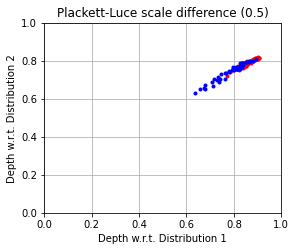

In [9]:
np.random.seed(1)
# Define data structures
scales = 1 - np.array(list(range(11))) / 20
print(scales)
pValues = np.ones((len(scales), 100))
for iSc in range(len(scales)):
    print("Scale value equals " + str(scales[iSc]))
    for iRep in range(100):
        print("Iteration " + str(iRep))
        # Generate the data
        empDist1, empDist2 = PlacketLuceDiff(550, 50, scales[iSc])
        # Plot the DD-plot
        print("Plotting DD-plot")
        depths1 = np.transpose(np.array([qrdepth(empDist1[:50,:], empDist1[:50,:]), qrdepth(empDist1[:50,:], empDist2)]))
        depths2 = np.transpose(np.array([qrdepth(empDist2, empDist1[:50,:]), qrdepth(empDist2, empDist2)]))
        plt.close("all")
        plt.figure(1, figsize=(4.25, 3.5))
        plt.title("Plackett-Luce scale difference (" + str(scales[iSc]) + ")")
        plt.plot(depths1[:,0], depths1[:,1], 'r.')
        plt.plot(depths2[:,0], depths2[:,1], 'b.')
        plt.xlabel("Depth w.r.t. Distribution 1")
        plt.ylabel("Depth w.r.t. Distribution 2")
        plt.ylim(0, 1)
        plt.xlim(0, 1)
        plt.grid()
        plt.savefig("pic-ddtest-n10-PlackettLuce-" + str(scales[iSc]) + ".pdf")
        print("Performing the test")
        # Calculate the depth statistics
        depthsTest1 = qrdepth(empDist1[:50,:], empDist1[50:,:])
        depthsTest2 = qrdepth(empDist2, empDist1[50:,:])
        depthsTestR = qrdepth(empDist1[50:,:], empDist1[50:,:])
        pDSmaller1 = np.zeros(50)
        for i in range(50):
            pDSmaller1[i] = np.mean(depthsTestR < depthsTest1[i])
        pDSmaller2 = np.zeros(50)
        for i in range(50):
            pDSmaller2[i] = np.mean(depthsTestR < depthsTest2[i])
        # Caculate the test statistics
        print("Calculating the p-value")
        nX = 50
        nY = 50
        W = np.sum(rankdata(np.concatenate((pDSmaller1, pDSmaller2)))[:50])
        print(W)
        Wmean = nY * (nX + nY + 1) / 2
        Wvar = nX * nY * (nX + nY + 1) / 12
        pr = norm.cdf(W, Wmean, np.sqrt(Wvar))
        pValues[iSc,iRep] = min(pr, 1 - pr)
        print(pValues[iSc,iRep])

In [15]:
np.savetxt("Results-testing.txt", pValues, delimiter = ",")
print(scales)
print(np.mean(pValues, axis = 1))

[1.   0.95 0.9  0.85 0.8  0.75 0.7  0.65 0.6  0.55 0.5 ]
[2.55687067e-01 2.34803108e-01 1.35157555e-01 8.48965359e-02
 2.07012605e-02 6.62020255e-03 1.36519658e-03 2.36736109e-04
 1.59587578e-05 5.61040326e-07 2.06107787e-08]


Plot the average p-values

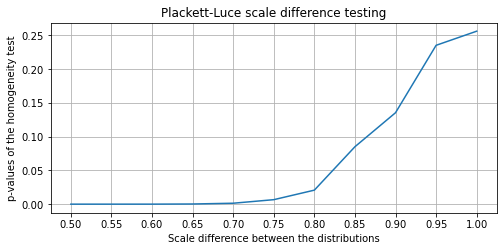

In [22]:
plt.close("all")
plt.figure(1, figsize=(8, 3.5))
plt.title("Plackett-Luce scale difference testing")
plt.plot(scales, np.mean(pValues, axis = 1), '-')
plt.xlabel("Scale difference between the distributions")
plt.ylabel("p-values of the homogeneity test")
plt.xticks(scales)
plt.grid()
plt.savefig("pic-ptest-n10-PlackettLuce.pdf")